http://api.census.gov/data/2013/acs5/profile?get=DP02_0001PE&for=state:*&key=d7814c2f2b9373aea29d9e118cb484f6099dc570

This
http://api.census.gov/data/2013/acs5?get=NAME,B01001_001E&for=block+group:0&in=state:06+county:061+tract:990000&key=d7814c2f2b9373aea29d9e118cb484f6099dc570

data
http://api.census.gov/data/2013/acs5/profile/variables.html

hierarchy:
http://api.census.gov/data/2013/acs5/examples.html

key:
d7814c2f2b9373aea29d9e118cb484f6099dc570

geographies
http://api.census.gov/data/2010/sf1/geo.html

good intro
http://www.mooreds.com/wordpress/archives/963

tuscon: 32°13′18″N 110°55′35″W
Get FIPS id for the location
http://data.fcc.gov/api/block/find?latitude=32.05&longitude=-110.9&showall=false&format=json
-->040190041141062
04 = state
019 = county
004114 = tract
1062 = block

http://api.census.gov/data/2013/acs5/examples.html


    http://api.census.gov/data/2011/acs5?get=[the data code that you found above]&for=tract:[tract code or *]&in=state:[state code]+county:[county code]&key=[your key]
    
    
1. Originally find variable id at http://api.census.gov/data/2013/acs5/profile/variables.html . This doesn't seem to work, so use the list in UScensusVariables.txt from http://proximityone.com/s&o/guide/tableitems_acs2010.htm

e.g.  (commuting to work)

2. Find FIPS code (location) at: http://data.fcc.gov/api/block/find?latitude=43.05&longitude=-100.9&showall=false&format=json

3. Split FIPS code into parts: 461219401003036
    state: 46
    county: 121
    tract: 940100
    block: 3036

4. Create query:
    http://api.census.gov/data/2013/acs5?get=[datacode]&for=tract:[tractOr*]&in=state:[state]+county:[county]&key=[key]
    http://api.census.gov/data/2013/acs5?get=DP02_0001E&for=tract:940100&in=state:46+county:121&key=d7814c2f2b9373aea29d9e118cb484f6099dc570
    

Tracts have a population of between 1,200 and 8000. https://www.census.gov/geo/reference/gtc/gtc_ct.html
Blocks have a population of between 0 and a few hundred.

We can find the block from Lat/Long using the fcc page
ZIP code only gives us the tract (note, a ZIP code has, on average 10,000 people in).


Off topic: UK: Number of males and females at each postcode: http://www.ons.gov.uk/ons/about-ons/business-transparency/freedom-of-information/previous-foi-requests/people--population-and-community/households-per-postcode/index.html

###ZIP codes to location

Unfortunately costs money.

Plan

1. Ask city
2. Ask for landmark distances!

Also found:

http://mcdc.missouri.edu/websas/geocorr12.html <<

number of blocks in each zip code (in WY)
over 1000: 2
500-1000: 13
300-500: 12
100-300: 26
50-100: 30
10-50: 73
1-10: 18

zip->lat/long available here: https://github.com/openacs/ref-us-zipcodes/blob/master/info/zcta5.txt
in particular at:
https://raw.githubusercontent.com/openacs/ref-us-zipcodes/master/info/zcta5.txt

 The ZCTA file contains data for all 5 digit ZCTAs in the 50 states, District of Columbia and Puerto Rico as of Census 2000. The file is plain ASCII text, one line per record.

    * Columns 1-2: United States Postal Service State Abbreviation
    * Columns 3-66: Name (e.g. 35004 5-Digit ZCTA - there are no post office names)
    * Columns 67-75: Total Population (2000)
    * Columns 76-84: Total Housing Units (2000)
    * Columns 85-98: Land Area (square meters) - Created for statistical purposes only.
    * Columns 99-112: Water Area (square meters) - Created for statistical purposes only.
    * Columns 113-124: Land Area (square miles) - Created for statistical purposes only.
    * Columns 125-136: Water Area (square miles) - Created for statistical purposes only.
    * Columns 137-146: Latitude (decimal degrees) First character is blank or "-" denoting North or South latitude respectively
    * Columns 147-157: Longitude (decimal degrees) First character is blank or "-" denoting East or West longitude respectively 


In [1]:
import pandas as pd
data = pd.read_csv('/home/lionfish/Desktop/geocorr12.csv',skiprows=[1])

In [2]:
data.head()

,zcta5,county,tract,block,cntyname,zipname,pop10,afact
0,57717,56011,9502,1000,Crook WY,"Belle Fourche, SD",8,0.114
1,57717,56011,9502,1462,Crook WY,"Belle Fourche, SD",3,0.043
2,57717,56011,9502,1466,Crook WY,"Belle Fourche, SD",13,0.186
3,57717,56011,9502,1480,Crook WY,"Belle Fourche, SD",2,0.029
4,57717,56011,9502,1481,Crook WY,"Belle Fourche, SD",5,0.071


In [3]:
import pandas as pd
data = pd.read_csv('/home/lionfish/Desktop/geocorr12.csv',skiprows=[1])
maxBlocks = 990
zips = data['zcta5'].unique()
for zip in zips:
    d = data[data['zcta5']==zip]
    d.sort('afact')
    if (len(d)>maxBlocks):
        shortdata = d[0:maxBlocks]
    else:
        shortdata = d
    #shortdata = d[d['afact']>0.001]
   # print "%3d of %3d: %0.2f" % (len(shortdata), len(d), sum(shortdata['afact']))

In [4]:
data[0:1]

,zcta5,county,tract,block,cntyname,zipname,pop10,afact
0,57717,56011,9502,1000,Crook WY,"Belle Fourche, SD",8,0.114


##Get ZIP code to block group

In [10]:
import urllib2
import urllib
import sqlite3
import csv
import re

states=['Mo29','Al01','Ak02','Az04','Ar05','Ca06','Co08','Ct09','De10','Dc11','Fl12','Ga13','Hi15','Id16','Il17','In18','Ia19','Ks20','Ky21','La22','Me23','Md24','Ma25','Mi26','Mn27','Ms28','Mt30','Ne31','Nv32','Nh33','Nj34','Nm35','Ny36','Nc37','Nd38','Oh39','Ok40','Or41','Pa42','Ri44','Sc45','Sd46','Tn47','Tx48','Ut49','Vt50','Va51','Wa53','Wv54','Wi55','Wy56']
geolevel = 'blockgroup'

conn = sqlite3.connect('us_geo_%s.db' % geolevel)
conn.execute('CREATE TABLE IF NOT EXISTS us_geo (zcta5 TEXT, state TEXT, county TEXT, tract TEXT, %s TEXT, cntyname TEXT, zipname TEXT, pop10 INTEGER, afact FLOAT)' % geolevel)

conn.text_factory = str
for state in states:
    stateid = state[2:4]
    print "State %s:" %state
    print "    Requesting processed CSV file"
    if geolevel == 'block':
        lbl = 'block';
    if geolevel == 'blockgroup':
        lbl = 'bg';
    url = 'http://mcdc.missouri.edu/cgi-bin/broker?_PROGRAM=websas.geocorr12.sas&_SERVICE=bigtime&site=OSEDA%%2FMCDC%%2FUniv.+of+Missouri&state=%s&g1_=zcta5&g2_=%s&wtvar=pop10&nozerob=1&csvout=1&lstfmt=txt&namoptf=b&namoptr=b&title=s1&counties=&metros=&places=&distance=&y0lat=&x0long=&locname=&nrings=&r1=&r2=&r3=&r4=&r5=&r6=&r7=&r8=&r9=&r10=&lathi=&latlo=&longhi=&longlo=&_DEBUG=0' % (state,lbl)
    response = urllib2.urlopen(url)    
    html = response.read()    
    csvfile = re.findall('href="([^"]*)"',html)[0]
    csvfile = 'http://mcdc.missouri.edu' + csvfile
    print "    Downloading CSV file (%s)" % csvfile
    urllib.urlretrieve(csvfile,filename='geocorr12.csv')
    print "    Adding to database"
    csvReader = csv.reader(open('geocorr12.csv'), delimiter=',', quotechar='"')
    for i,row in enumerate(csvReader):
        if i<2:
            continue
            # #(row['zcta5'],row['county'],row['tract'],row['block'],row['cntyname'],row['zipname'],row['pop10'],row['afact']))
        conn.execute('INSERT INTO us_geo (zcta5,state,county,tract,%s,cntyname,zipname,pop10,afact) VALUES (?,?,?,?,?,?,?,?,?)' % geolevel, (row[0],stateid,row[1],row[2],row[3],row[4],row[5],row[6],row[7])) 
    print "    Committing to database"
    conn.commit()
    
print "Complete"
conn.close()

State Mo29:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Al01:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Ak02:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Az04:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Ar05:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Ca06:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Co08:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Ct09:
    Requesting processed CSV file
    Adding to database
    Committing to database
State De10:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Dc11:
    Requesting processed CSV file
    Adding to database
    Committing to database
State Fl12:
    Requesting processed CSV

##Shapefiles for blockgroups

In [8]:
#Download shapefiles for Blocks in all States.
#From https://www.census.gov/cgi-bin/geo/shapefiles2011/main
import os
import zipfile
import sqlite3 as lite
import urllib
import shapefile
import json

states=['Mo29','Al01','Ak02','Az04','Ar05','Ca06','Co08','Ct09','De10','Dc11','Fl12','Ga13','Hi15','Id16','Il17','In18','Ia19','Ks20','Ky21','La22','Me23','Md24','Ma25','Mi26','Mn27','Ms28','Mt30','Ne31','Nv32','Nh33','Nj34','Nm35','Ny36','Nc37','Nd38','Oh39','Ok40','Or41','Pa42','Ri44','Sc45','Sd46','Tn47','Tx48','Ut49','Vt50','Va51','Wa53','Wv54','Wi55','Wy56']
pathToData = '/home/lionfish/api_data/'; #TEMPORARY!    


#geographic level
geolevel = 'blockgroup' #or block
if geolevel == 'block':  
    dbfile = pathToData + 'block_boundaries.db'
if geolevel == 'blockgroup':
    dbfile = pathToData + 'blockgroup_boundaries.db'

os.remove(dbfile) #erase to avoid a mess
con = lite.connect(dbfile)

cur = con.cursor()
cur.execute('DROP TABLE IF EXISTS boundaries')
if geolevel == 'block':
    cur.execute('CREATE TABLE IF NOT EXISTS boundaries (id INTEGER PRIMARY KEY AUTOINCREMENT, bbox0 DECIMAL(9,6), bbox1 DECIMAL(9,6), bbox2 DECIMAL(9,6), bbox3 DECIMAL(9,6), state CHAR(2), county CHAR(3), tract CHAR(6), block CHAR(4), geoid CHAR(15), shape VARCHAR(50000));')
if geolevel == 'blockgroup':
    cur.execute('CREATE TABLE IF NOT EXISTS boundaries (id INTEGER PRIMARY KEY AUTOINCREMENT, bbox0 DECIMAL(9,6), bbox1 DECIMAL(9,6), bbox2 DECIMAL(9,6), bbox3 DECIMAL(9,6), state CHAR(2), county CHAR(3), tract CHAR(6), blockgroup CHAR(1), geoid CHAR(12), shape VARCHAR(50000));')
cur.execute('CREATE INDEX bbox0 ON boundaries (bbox0);')
cur.execute('CREATE INDEX bbox1 ON boundaries (bbox1);')
cur.execute('CREATE INDEX bbox2 ON boundaries (bbox2);')
cur.execute('CREATE INDEX bbox3 ON boundaries (bbox3);')

print "Extracting %s shapefiles." % geolevel
for state in states:
    cur.close()
    con.commit()
    cur = con.cursor()
    
    stateid = state[2:4]
    print "State %s" %state
    print "   Downloading"
    try:
        os.removedirs('/tmp/tempdata') #erase temporary directory to keep space free
        os.remove('/tmp/tempdata.zip') #erase temporary zip file (could even have opened in memory, but don't want to run out)
    except OSError:
        pass #no file/dir to remove
    if geolevel == 'block':
        #todo switch to 2010 blocks
        url = 'http://www2.census.gov/geo/tiger/TIGER2011/TABBLOCK/tl_2011_%s_tabblock.zip' % stateid
    if geolevel == 'blockgroup':
        #switched to 2010 blockgroups
        #url = 'http://www2.census.gov/geo/tiger/TIGER2011/BG/tl_2011_%s_bg.zip' % stateid
        url = 'http://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_%s_bg10.zip' % stateid
        
    urllib.urlretrieve(url,filename='/tmp/tempdata.zip')
    print "   Extracting"
    zf = zipfile.ZipFile("/tmp/tempdata.zip")
    for f in zf.infolist():       
        zf.extract(f.filename,"/tmp/tempdata")

    print "   Adding boundaries to database"
    if geolevel == 'block':
        shapefilename = "/tmp/tempdata/tl_2011_%s_tabblock.shp" % stateid
    if geolevel == 'blockgroup':
        shapefilename = "/tmp/tempdata/tl_2010_%s_bg10.shp" % stateid
    sf = shapefile.Reader(shapefilename)
    
    a = []
    for i in range(sf.numRecords):
        if ((i % 1000)==0):
            print "      (%d of %d complete)" % (i,sf.numRecords)
            cur.close()
            con.commit()
            cur = con.cursor()
        shp = sf.shape(i)
        rec = sf.record(i)
        bbox= shp.bbox

        shpstring = json.dumps([[p[0],p[1]] for p in shp.points])
        #recstring = json.dumps(rec) #incorporated the contents of this record into the database
        if geolevel == 'block': #note, differences in position in record may largely be due to the 'block' data coming from the 2011 dataset
            cur.execute('INSERT INTO boundaries (bbox0, bbox1, bbox2, bbox3, state, county, tract, block, geoid, shape) VALUES (?,?,?,?,?,?,?,?,?,?)',(bbox[0],bbox[1],bbox[2],bbox[3],rec[2],rec[3],rec[4],rec[5],rec[7],shpstring));
        if geolevel == 'blockgroup':
            cur.execute('INSERT INTO boundaries (bbox0, bbox1, bbox2, bbox3, state, county, tract, blockgroup, geoid, shape) VALUES (?,?,?,?,?,?,?,?,?,?)',(bbox[0],bbox[1],bbox[2],bbox[3],rec[0],rec[1],rec[2],rec[3],rec[4],shpstring));
cur.close()
con.commit()
con.close()

Extracting blockgroup shapefiles.
State Mo29
   Downloading
   Extracting
   Adding boundaries to database
      (0 of 4506 complete)
      (1000 of 4506 complete)
      (2000 of 4506 complete)
      (3000 of 4506 complete)
      (4000 of 4506 complete)
State Al01
   Downloading
   Extracting
   Adding boundaries to database
      (0 of 3438 complete)
      (1000 of 3438 complete)
      (2000 of 3438 complete)
      (3000 of 3438 complete)
State Ak02
   Downloading
   Extracting
   Adding boundaries to database
      (0 of 534 complete)
State Az04
   Downloading
   Extracting
   Adding boundaries to database
      (0 of 4178 complete)
      (1000 of 4178 complete)
      (2000 of 4178 complete)
      (3000 of 4178 complete)
      (4000 of 4178 complete)
State Ar05
   Downloading
   Extracting
   Adding boundaries to database
      (0 of 2147 complete)
      (1000 of 2147 complete)
      (2000 of 2147 complete)
State Ca06
   Downloading
   Extracting
   Adding boundaries to database
    

![block state based shapefile record layout](block_state_based_shapefile_record_layout.png)
![blockgroup state based shapefile record layout](blockgroup_state_based_shapefile_record_layout.png)

From http://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2013/TGRSHP2013_TechDoc_Ch5.pdf

In [ ]:
cur.execute('CREATE TABLE IF NOT EXISTS boundaries 
            (id INTEGER PRIMARY KEY AUTOINCREMENT, 
             bbox0 DECIMAL(9,6), bbox1 DECIMAL(9,6), bbox2 DECIMAL(9,6), bbox3 DECIMAL(9,6), 
             state CHAR(2), county CHAR(3), tract CHAR(6), blockgroup CHAR(1), geoid CHAR(15), shape VARCHAR(50000));')
            0,1,2,3,4,

In [27]:
var_list = ['B01001_001E','B01001_002E','B01001_003E','B01001_004E']
varlist = ','.join(var_list)
url = 'http://api.census.gov/data/2011/acs5?get=%s&for=block+group:1&in=state:2+county:170+tract:101&key=d7814c2f2b9373aea29d9e118cb484f6099dc570' % varlist
response = urllib2.urlopen(url);
json_data = json.loads(response.read())


In [34]:
json_data[1][0:len(var_list)]

[u'575', u'287', u'0', u'3']

In [38]:
print var_list.extend(['test'])

None


In [37]:
var_list

['B01001_001E', 'B01001_002E', 'B01001_003E', 'B01001_004E', 'B012124']

In [45]:
a = var_list[:]

In [46]:
a.extend('z')

In [47]:
var_list

['B01001_001E',
 'B01001_002E',
 'B01001_003E',
 'B01001_004E',
 'B012124',
 'test',
 'b']

In [52]:
import numpy as np
np.array([var_list[0:2],var_list[2:4]])

array([['B01001_001E', 'B01001_002E'],
       ['B01001_003E', 'B01001_004E']], 
      dtype='|S11')

['B01001_003E', 'B01001_004E']

In [29]:
import urllib2
import json

def USCensusApiQuery(geoloc,variables):
        """Performs an API query to the US Census database, for the given location and variable 
        (pass state,county,tract and blockgroups as strings and lists, in a list as geoloc)
        (where the last one known should be a list, e.g.):
    - get total population of tracts 000101 and 000102 in county 170, in state 02
        USCensusApiQuery(['02','170',['000101','000102'],None],['B00001_001E'])
    - get total population in state 02
        USCensusApiQuery([['02'],None,None,None],['B00001_001E'])
    - get total population of blockgroup 1 in tract 000101, in county 170, in state 02
        USCensusApiQuery(['02','170','000101',['1']],['B00001_001E']) 
    - get total population of all counties in state 04
        USCensusApiQuery(['04',[],None,None],['B00001_001E']) 
    - get total population of all states
        USCensusApiQuery([[],None,None,None],['B00001_001E']) 
    - get total population and population of males in the US
        USCensusApiQuery([None,None,None,None],['B01001_001E','B01001_002E'])

        pass the list of queries in the second item
        
        #if the last not-none item in the geoloc is an empty list, then we'll return all the items...
        
        #!lengths of strings matter:
         state = 2 chars
         county = 3 chars
         tract = 6 chars
         blockgroup = 1 chars
         TODO Pad with zeros automatically
        """

        pathToServer = 'http://api.census.gov/data/2011';
        apiKey = 'd7814c2f2b9373aea29d9e118cb484f6099dc570';        
        geographicalHierarchy = '2011STATH';
        varlist = ','.join(variables)

        hierarchy = ['us','state', 'county', 'tract', 'block+group']
        hier = -1
        for i,h in enumerate(geoloc):
            if h!=None:
                hier = i
        if hier>3:
            hier = 3
            
        #if:  state,county,tract,blockgroup : hier
        #       x     x      x       x         3
        #       x     x      x      none       3
        #       x     x     none    none       2
        #       x    none   none    none       1
        #     none   none   none    none       0

        
        foritem = hierarchy[hier+1] #the item we put in the 'for' section is the first with a none in (or blockgroup if none have none in).

        inlist = []
        for h in range(hier):
            inlist.append(hierarchy[h+1]+':'+geoloc[h])
        inliststr = '+'.join(inlist)
        if len(inlist)>0:
            inliststr = '&in='+inliststr
        url = '%s/acs5?get=%s&for=%s:*%s&key=%s' % (pathToServer,varlist,foritem,inliststr,apiKey) 
        print url
        response = urllib2.urlopen(url);
        json_data = json.loads(response.read())
        data = []
        geos = []
        for place in json_data[1:]: #first item is the table headers
            vals = place[0:len(variables)]
            geo=place[len(variables):]
            if geoloc[hier]==None or (geo[hier] in geoloc[hier]) or geoloc[hier]==[]:
                data.append([int(v) for v in vals])
                geos.append(geo)
        return data,geos
#data = USCensusApiQuery(['02','170',['000101'],None],['B01001_001E','B01001_002E','B01001_003E','B01001_004E','B01001_005E'])
#data,geos = USCensusApiQuery(['02','170',['000101','000102'],None],['B01001_001E','B01001_002E'])
data,geos = USCensusApiQuery(['02',[],None,None],['B00001_001E']) 
print data
print "--"
print geos

http://api.census.gov/data/2011/acs5?get=B00001_001E&for=county:*&in=state:02&key=d7814c2f2b9373aea29d9e118cb484f6099dc570
[[788], [1190], [19263], [4266], [333], [273], [1161], [6368], [222], [524], [3176], [6747], [1253], [1145], [535], [9587], [2509], [1365], [2214], [511], [1182], [790], [175], [871], [1141], [2657], [281], [195], [1662]]
--
[[u'02', u'013'], [u'02', u'016'], [u'02', u'020'], [u'02', u'050'], [u'02', u'060'], [u'02', u'068'], [u'02', u'070'], [u'02', u'090'], [u'02', u'100'], [u'02', u'105'], [u'02', u'110'], [u'02', u'122'], [u'02', u'130'], [u'02', u'150'], [u'02', u'164'], [u'02', u'170'], [u'02', u'180'], [u'02', u'185'], [u'02', u'188'], [u'02', u'195'], [u'02', u'198'], [u'02', u'220'], [u'02', u'230'], [u'02', u'240'], [u'02', u'261'], [u'02', u'270'], [u'02', u'275'], [u'02', u'282'], [u'02', u'290']]


In [308]:
def getAgeDist(geoloc,returnList):
    """Gets the age distribution given a particular geographical area"""
    male = ['B01001_003E','B01001_004E','B01001_005E','B01001_006E','B01001_007E','B01001_008E','B01001_009E','B01001_010E','B01001_011E','B01001_012E','B01001_013E','B01001_014E','B01001_015E','B01001_016E','B01001_017E','B01001_018E','B01001_019E','B01001_020E','B01001_021E','B01001_022E','B01001_023E','B01001_024E','B01001_025E']
    female = ['B01001_027E','B01001_028E','B01001_029E','B01001_030E','B01001_031E','B01001_032E','B01001_033E','B01001_034E','B01001_035E','B01001_036E','B01001_037E','B01001_038E','B01001_039E','B01001_040E','B01001_041E','B01001_042E','B01001_043E','B01001_044E','B01001_045E','B01001_046E','B01001_047E','B01001_048E','B01001_049E']
    variables = male[:]
    variables.extend(female)
    results, geolocs = USCensusApiQuery(geoloc,variables)
    res = []
    for place_result in results:
        res.append(np.vstack([place_result[0:len(male)],place_result[len(male):]]))
    returnList[0] = res
rl = [0]
#getAgeDist(['02','170',['000101','000102'],None],rl)
getAgeDist([['02'],None,None,None],rl)

http://api.census.gov/data/2011/acs5?get=B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,B01001_017E,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E&for=state:*&key=d7814c2f2b9373aea29d9e118cb484f6099dc570


In [241]:
rl

[[array([[u'27148', u'25387', u'26510', u'16926', u'11018', u'6514', u'6375',
          u'17422', u'27626', u'23671', u'23258', u'25659', u'28121',
          u'28649', u'26605', u'7697', u'9427', u'4935', u'5795', u'6662',
          u'4135', u'2586', u'1422'],
         [u'25232', u'24022', u'24957', u'15915', u'9673', u'4780', u'4826',
          u'15193', u'24987', u'22093', u'22420', u'23538', u'26373',
          u'27128', u'23058', u'7246', u'8568', u'4397', u'5204', u'6618',
          u'4497', u'3611', u'2819']], 
        dtype='<U5')]]

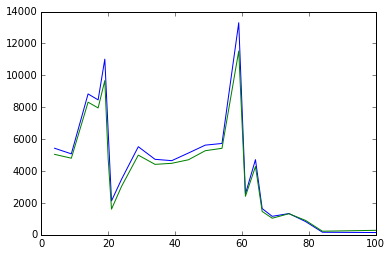

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline
ages = np.array([4,9,14,17,19,20,21,24,29,34,39,44,49,54,59,61,64,66,69,74,79,84,100])
delta = np.hstack([ages[1:]-ages[0:-1],10])
m = rl[0][0][0]
f = rl[0][0][1]

plt.plot(ages,m/delta,'-');
plt.plot(ages,f/delta,'-');

#plt.plot(ages,f[:,None]*delta[None],'-r');

In [3]:
cities = {}
for city in ['shef','shef','london','shef']:
    if city in cities:
        cities[city] += 1
    else:
        cities[city] = 1

In [7]:
for c in cities:
    print c

shef
london


In [32]:
import numpy as np
0.001 + np.array([1,2])

array([ 1.001,  2.001])

In [44]:
np.sum(np.random.randn(2,23),0).shape

(23,)

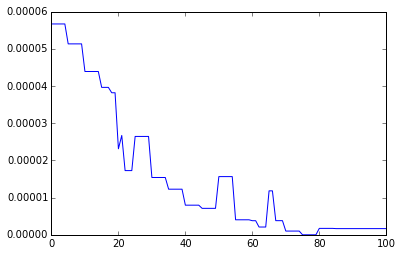

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(temp)

In [53]:
temp = temp/np.sum(temp)
np.sum(temp*np.arange(0,101))

21.446268640612857